In [1]:
from fastai import *
from fastai.tabular import *

In [2]:
train = pd.read_csv("/home/shanmugam/fastai/ion/data-without-drift/train_clean.csv")
test = pd.read_csv("/home/shanmugam/fastai/ion/data-without-drift/test_clean.csv")

In [3]:
procs=[FillMissing, Categorify, Normalize]
cat = []
cont=['signal']
path = "/home/shanmugam/fastai/ion/"
tab_db = (TabularList.from_df(train, cat_names=cat,cont_names=cont,procs=procs,path=path)
                     .split_by_idxs(train_idx=list(range(0,3000000)),valid_idx=list(range(3000000,5000000)))
                      .label_from_df(cols='open_channels')
                      .add_test(TabularList.from_df(test,cat_names=cat,cont_names=cont,procs=procs, path=path), label=0)
                       .databunch(bs=512,num_workers=1))

In [4]:
y_range=torch.tensor([0,np.max(train['open_channels'])*1.1],device=defaults.device)

In [5]:
fscore = FBeta(average='macro', beta=1)

In [6]:
emb_s = {'signal': 1500}

In [7]:
learn = tabular_learner(tab_db,layers=[3000,2000,1000,500,250,100],ps=[0.0001,0.0001,0.0001,0.001,0.01,0.1],y_range=y_range)

In [8]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=5, random_state=321, shuffle=True)
indices= [(train_index, test_index) for (train_index, test_index) in folds.split(train.index, train['open_channels'])]

In [14]:
indices[0][0]

array([      0,       1,       3,       6, ..., 4999996, 4999997, 4999998, 4999999])

In [15]:
procs=[FillMissing, Categorify, Normalize]
cat = []
cont=['signal']
train_idx = indices[0][0]
valid_idx = indices[0][1]
path = "/home/shanmugam/fastai/ion/"
tab_db = (TabularList.from_df(train, cat_names=cat,cont_names=cont,procs=procs,path=path)
                     .split_by_idxs(train_idx,valid_idx)
                      .label_from_df(cols='open_channels')
                      .add_test(TabularList.from_df(test,cat_names=cat,cont_names=cont,procs=procs, path=path), label=0)
                       .databunch(bs=512,num_workers=1))
emb_s = {'signal': 1500}
learn = tabular_learner(tab_db,layers=[2000,1000],ps=[0.01,0.1],y_range=y_range,metrics=accuracy)
%debug
learn.fit_one_cycle(1,max_lr=1e-03,wd=1.3)
loss,acc = learn.validate()
acc_val.append(acc.numpy())

> /home/shanmugam/anaconda3/lib/python3.7/site-packages/fastai/data_block.py(119)__getitem__()
    117         idxs = try_int(idxs)
    118         if isinstance(idxs, Integral): return self.get(idxs)
--> 119         else: return self.new(self.items[idxs], inner_df=index_row(self.inner_df, idxs))
    120 
    121     @classmethod

ipdb> q


epoch,train_loss,valid_loss,accuracy,time
0,0.399261,0.365305,0.864448,03:28


NameError: name 'acc_val' is not defined

In [52]:
y_range=torch.tensor([-0.001,np.max(train['open_channels'])*1.1],device=defaults.device)
acc_val = []
for train_idx, valid_idx in folds.split(train.index,train['open_channels']):
    procs=[FillMissing, Categorify, Normalize]
    cat = []
    cont=['signal']
    path = "/home/shanmugam/fastai/ion/"
    tab_db = (TabularList.from_df(train, cat_names=cat,cont_names=cont,procs=procs,path=path)
                     .split_by_idxs(train_idx,valid_idx)
                      .label_from_df(cols='open_channels')
                      .add_test(TabularList.from_df(test,cat_names=cat,cont_names=cont,procs=procs, path=path), label=0)
                       .databunch(bs=512,num_workers=1))
    emb_s = {'signal': 1500}
    learn = tabular_learner(tab_db,layers=[2000,1000],ps=[0.01,0.1],y_range=y_range,metrics=accuracy)
    learn.fit_one_cycle(3,max_lr=1e-03,wd=1.3)
    loss,acc = learn.validate()
    acc_val.append(acc.numpy())

epoch,train_loss,valid_loss,accuracy,time
0,0.428231,0.392076,0.856528,03:27
1,0.425575,0.400099,0.851452,03:22
2,0.390692,0.366984,0.864973,03:21


epoch,train_loss,valid_loss,accuracy,time
0,0.426598,0.467541,0.817278,03:22
1,0.422532,0.417131,0.839884,03:24
2,0.402563,0.368076,0.864413,03:23


epoch,train_loss,valid_loss,accuracy,time
0,0.439095,0.522336,0.803719,03:24
1,0.424261,0.410937,0.850184,03:24
2,0.404324,0.367608,0.864523,03:26


epoch,train_loss,valid_loss,accuracy,time
0,0.434199,0.396631,0.854396,03:30
1,0.410117,0.398418,0.849527,03:22
2,0.389577,0.366213,0.865662,03:26


epoch,train_loss,valid_loss,accuracy,time
0,0.435944,0.463872,0.835478,03:22
1,0.419808,0.400430,0.851893,03:19
2,0.393797,0.364515,0.865652,03:18


epoch,train_loss,valid_loss,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


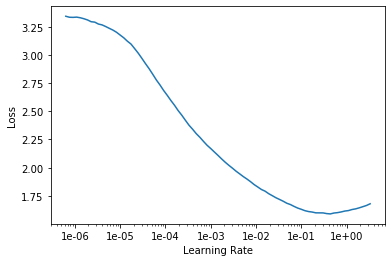

In [7]:
learn.lr_find()
learn.recorder.plot()

In [8]:
learn.fit_one_cycle(4,max_lr=1e-03,wd=1.3)

epoch,train_loss,valid_loss,time
0,0.345342,0.665674,03:25
1,0.349600,0.551418,03:28
2,0.335137,0.541575,03:23
3,0.324329,0.483651,03:24


In [9]:
learn.fit_one_cycle(6,max_lr=1e-03,wd=1.3)

epoch,train_loss,valid_loss,time
0,0.355351,0.631567,03:22
1,0.375654,0.591891,03:23
2,0.351848,0.509665,03:23
3,0.338878,0.589462,03:24
4,0.335799,0.495229,03:27
5,0.324183,0.478046,03:29


In [42]:
%debug
'/home/shanmugam/anaconda3/lib/python3.7/site-packages/fastai/basic_train.py'

None
> <ipython-input-40-5f8475445b2f>(1)<module>()
----> 1 u

ipdb> n


'/home/shanmugam/anaconda3/lib/python3.7/site-packages/fastai/basic_train.py'

In [51]:
learn

Learner(data=TabularDataBunch;

Train: LabelList (3999997 items)
x: TabularList
signal -1.1427; ,signal -1.1812; ,signal -1.2956; ,signal -1.1183; ,signal -1.0758; 
y: CategoryList
0,0,0,0,0
Path: /home/shanmugam/fastai/ion;

Valid: LabelList (1000003 items)
x: TabularList
signal -1.0010; ,signal -1.3005; ,signal -1.0952; ,signal -0.9645; ,signal -1.3208; 
y: CategoryList
0,0,0,0,0
Path: /home/shanmugam/fastai/ion;

Test: LabelList (2000000 items)
x: TabularList
signal -1.0984; ,signal -1.1787; ,signal -1.1830; ,signal -1.0121; ,signal -1.0847; 
y: CategoryList
0,0,0,0,0
Path: /home/shanmugam/fastai/ion, model=TabularModel(
  (embeds): ModuleList()
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=1, out_features=2000, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   

In [49]:

preds, _ = learn.get_preds(DatasetType.Test)


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f715ed31950>
Traceback (most recent call last):
  File "/home/shanmugam/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 926, in __del__
    self._shutdown_workers()
  File "/home/shanmugam/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 906, in _shutdown_workers
    w.join()
  File "/home/shanmugam/anaconda3/lib/python3.7/multiprocessing/process.py", line 138, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f715ed31950>
Traceback (most recent call last):
  File "/home/shanmugam/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 926, in __del__
    self._shutdown_workers()
  File "/home/shanmugam/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 906,

KeyboardInterrupt: 

In [29]:
y = torch.argmax(preds, dim=1)
y.sum()

tensor(2624731)

In [13]:
sub = pd.read_csv("/home/shanmugam/fastai/sample_submission.csv")

In [32]:
test = test.drop(['signal'], axis=1)

In [33]:
test['open_channels'] = y

In [35]:
test.to_csv('submission_p.csv', index = False,float_format='%.4f')

In [34]:
test

,time,open_channels
0,500.0001,0
1,500.0002,0
2,500.0003,0
3,500.0004,0
4,500.0005,0
...,...,...
1999995,699.9996,0
1999996,699.9997,0
1999997,699.9998,0
1999998,699.9999,0
